In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)

In [2]:
df_orignal=pd.read_excel('./aspiring_minds_employability_outcomes_2015.xlsx')
df=df_orignal.copy()
df.head()

Unnamed: 0      ID   Salary        DOJ                  DOL   
0      train  203097   420000 2012-06-01              present  \
1      train  579905   500000 2013-09-01              present   
2      train  810601   325000 2014-06-01              present   
3      train  267447  1100000 2011-07-01              present   
4      train  343523   200000 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  ...   
0   senior quality engineer  Bangalore      f 1990-02-19          84.3  ...  \
1         assistant manager     Indore      m 1989-10-04          85.4  ...   
2          systems engineer    Chennai      f 1992-08-03          85.0  ...   
3  senior software engineer    Gurgaon      m 1989-12-05          85.6  ...   
4                       get    Manesar      m 1991-02-27          78.0  ...   

  ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg   
0              -1              -1              -1          -1         -1  \
1              -1              -1              -1          -1         -1   
2              -1              -1              -1          -1         -1   
3              -1              -1              -1          -1         -1   
4              -1              -1              -1          -1         -1   

   conscientiousness agreeableness extraversion  nueroticism   
0             0.9737        0.8128       0.5269      1.35490  \
1            -0.7335        0.3789       1.2396     -0.10760   
2             0.2718        1.7109       0.1637     -0.86820   
3             0.0464        0.3448      -0.3440     -0.40780   
4            -0.8810       -0.2793      -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 39 columns]

In [3]:
df.shape

(3998, 39)

In [4]:
df.columns


Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [5]:
#Dropping unnecessary columns since they are unnecessary for our analysis.

df.drop(columns=['10percentage', '10board', '12graduation','12percentage', 
                 'CollegeCityTier','12board','CollegeState','CollegeCityID','CollegeID','English',
                 'Logical', 'Quant', 'Domain',],axis=1,inplace=True)
df.drop(columns=['ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],axis=1,inplace=True)
df.drop(columns=['ID',"DOJ",'DOL','Unnamed: 0' ],axis=1,inplace=True)

In [6]:
df.head()

Salary               Designation    JobCity Gender        DOB   
0   420000   senior quality engineer  Bangalore      f 1990-02-19  \
1   500000         assistant manager     Indore      m 1989-10-04   
2   325000          systems engineer    Chennai      f 1992-08-03   
3  1100000  senior software engineer    Gurgaon      m 1989-12-05   
4   200000                       get    Manesar      m 1991-02-27   

   CollegeTier       Degree                             Specialization   
0            2  B.Tech/B.E.                       computer engineering  \
1            2  B.Tech/B.E.  electronics and communication engineering   
2            2  B.Tech/B.E.                     information technology   
3            1  B.Tech/B.E.                       computer engineering   
4            2  B.Tech/B.E.  electronics and communication engineering   

   collegeGPA  GraduationYear  
0       78.00            2011  
1       70.06            2012  
2       70.00            2014  
3       74.64            2011  
4       73.90            2012

In [7]:
df.shape

(3998, 10)

In [8]:
df.describe()

Salary                            DOB  CollegeTier   collegeGPA   
count  3.998000e+03                           3998  3998.000000  3998.000000  \
mean   3.076998e+05  1990-12-06 06:01:15.637819008     1.925713    71.486171   
min    3.500000e+04            1977-10-30 00:00:00     1.000000     6.450000   
25%    1.800000e+05            1989-11-16 06:00:00     2.000000    66.407500   
50%    3.000000e+05            1991-03-07 12:00:00     2.000000    71.720000   
75%    3.700000e+05            1992-03-13 18:00:00     2.000000    76.327500   
max    4.000000e+06            1997-05-27 00:00:00     2.000000    99.930000   
std    2.127375e+05                            NaN     0.262270     8.167338   

       GraduationYear  
count     3998.000000  
mean      2012.105803  
min          0.000000  
25%       2012.000000  
50%       2013.000000  
75%       2014.000000  
max       2017.000000  
std         31.857271

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Salary          3998 non-null   int64         
 1   Designation     3998 non-null   object        
 2   JobCity         3998 non-null   object        
 3   Gender          3998 non-null   object        
 4   DOB             3998 non-null   datetime64[ns]
 5   CollegeTier     3998 non-null   int64         
 6   Degree          3998 non-null   object        
 7   Specialization  3998 non-null   object        
 8   collegeGPA      3998 non-null   float64       
 9   GraduationYear  3998 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 312.5+ KB


In [10]:
#Analysing Specialization 

In [11]:
df.Specialization.value_counts()

Specialization
electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
applied electronics and instrumentation          9
chemical enginee

<Axes: xlabel='Specialization'>

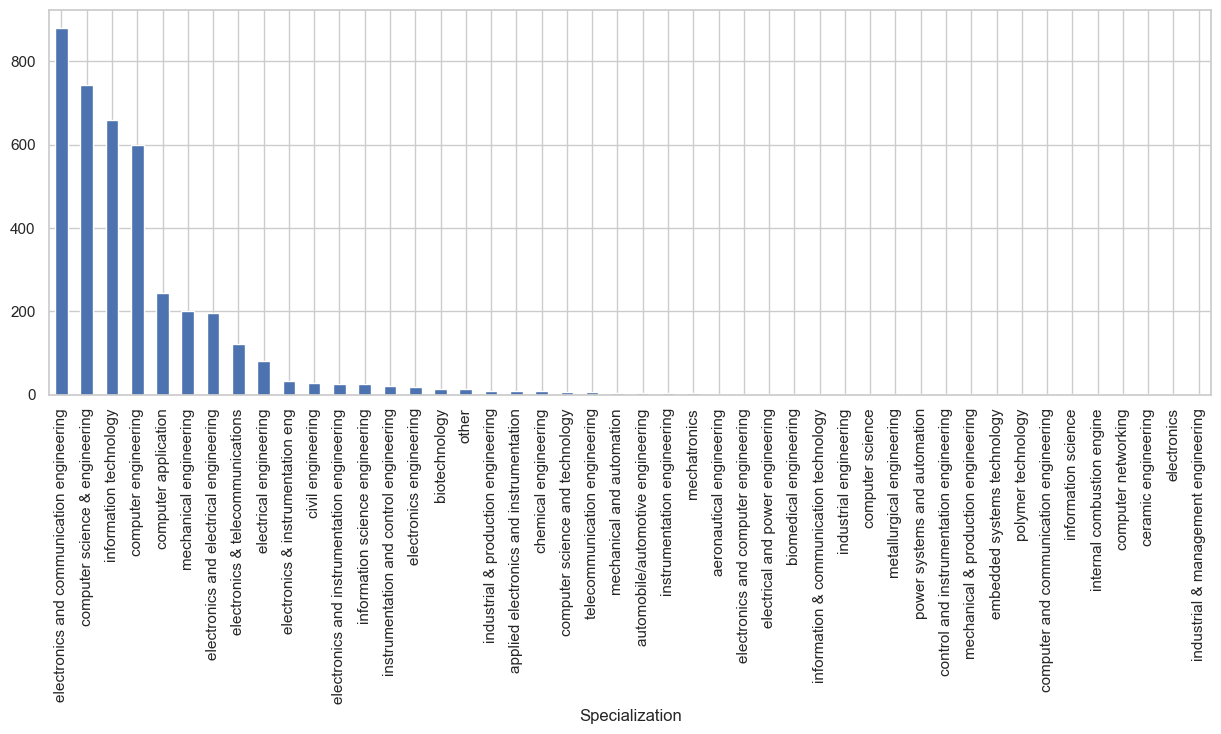

In [12]:
df['Specialization'].value_counts().plot(kind='bar', figsize=(15,5))

In [13]:
# since we have lot of specilization there will be noise
# we can reduce them to more generic specilization (CSE, ECE,Mech ,Elect)

In [14]:
specialization_map = {
    'electronics and communication engineering' : 'ECE',
    'computer science & engineering' : 'CSE',
    'information technology' : 'CSE' ,
    'computer engineering' : 'CSE',
    'computer application' : 'CSE',
    'mechanical engineering' : 'Mech',
    'electronics and electrical engineering' : 'ECE',
    'electronics & telecommunications' : 'ECE',
    'electrical engineering' : 'Electric',
    'electronics & instrumentation eng' : 'ECE',
    'civil engineering' : 'Other',
    'electronics and instrumentation engineering' : 'ECE',
    'information science engineering' : 'CSE',
    'instrumentation and control engineering' : 'ECE',
    'electronics engineering' : 'ECE',
    'biotechnology' : 'Other',
    'other' : 'Other',
    'industrial & production engineering' : 'Other',
    'chemical engineering' : 'Other',
    'applied electronics and instrumentation' : 'ECE',
    'computer science and technology' : 'CSE',
    'telecommunication engineering' : 'ECE',
    'mechanical and automation' : 'Mech',
    'automobile/automotive engineering' : 'Mech',
    'instrumentation engineering' : 'ECE',
    'mechatronics' : 'Mech',
    'electronics and computer engineering' : 'CSE',
    'aeronautical engineering' : 'Mech',
    'computer science' : 'CSE',
    'metallurgical engineering' : 'Other',
    'biomedical engineering' : 'Other',
    'industrial engineering' : 'Other',
    'information & communication technology' : 'ECE',
    'electrical and power engineering' : 'Electric',
    'industrial & management engineering' : 'Other',
    'computer networking' : 'CSE',
    'embedded systems technology' : 'ECE',
    'power systems and automation' : 'Electric',
    'computer and communication engineering' : 'CSE',
    'information science' : 'CSE',
    'internal combustion engine' : 'Mech',
    'ceramic engineering' : 'Other',
    'mechanical & production engineering' : 'Mech',
    'control and instrumentation engineering' : 'ECE',
    'polymer technology' : 'Other',
    'electronics' : 'ECE'
}


<Axes: xlabel='Branch'>

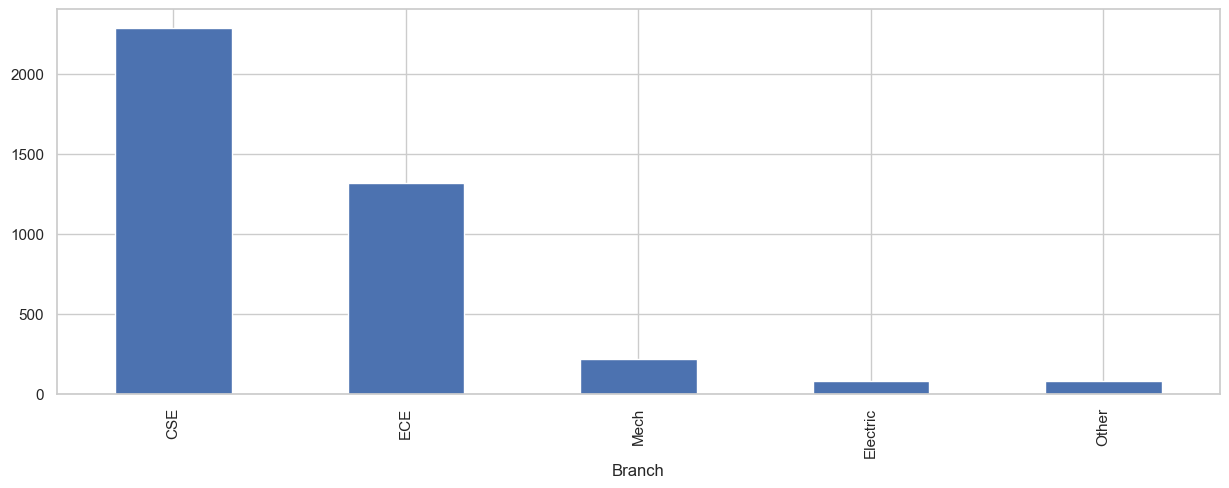

In [15]:
df['Branch'] = df['Specialization'].map(specialization_map)
df['Branch'].value_counts().plot(kind='bar', figsize=(15,5))


In [16]:
# Most of Specialization are in Computer Science Department

In [17]:
df.head()

Salary               Designation    JobCity Gender        DOB   
0   420000   senior quality engineer  Bangalore      f 1990-02-19  \
1   500000         assistant manager     Indore      m 1989-10-04   
2   325000          systems engineer    Chennai      f 1992-08-03   
3  1100000  senior software engineer    Gurgaon      m 1989-12-05   
4   200000                       get    Manesar      m 1991-02-27   

   CollegeTier       Degree                             Specialization   
0            2  B.Tech/B.E.                       computer engineering  \
1            2  B.Tech/B.E.  electronics and communication engineering   
2            2  B.Tech/B.E.                     information technology   
3            1  B.Tech/B.E.                       computer engineering   
4            2  B.Tech/B.E.  electronics and communication engineering   

   collegeGPA  GraduationYear Branch  
0       78.00            2011    CSE  
1       70.06            2012    ECE  
2       70.00            2014    CSE  
3       74.64            2011    CSE  
4       73.90            2012    ECE

<Axes: ylabel='Frequency'>

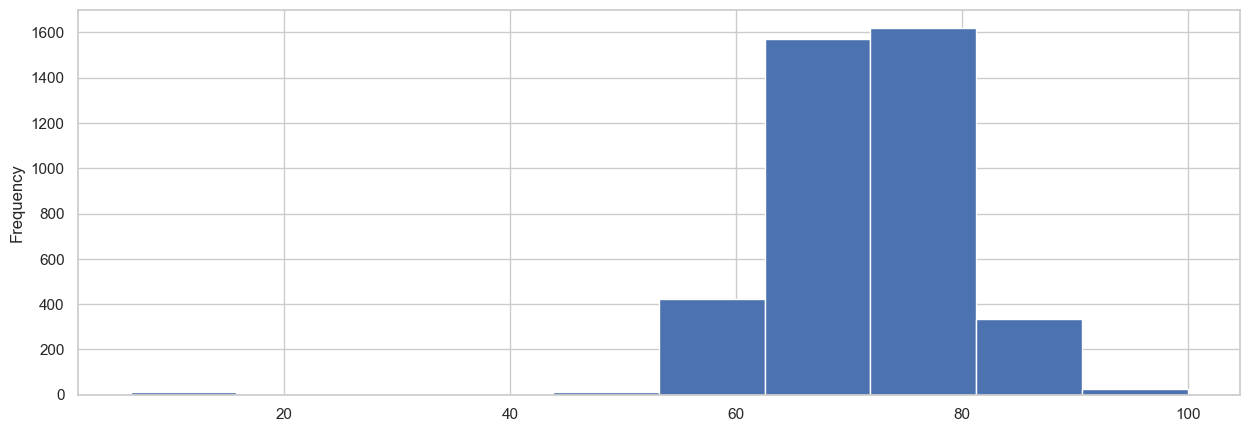

In [18]:
df['collegeGPA'].plot(kind='hist', figsize=(15,5))


In [19]:
# Most of the student got 70 - 80  GPA

<Axes: >

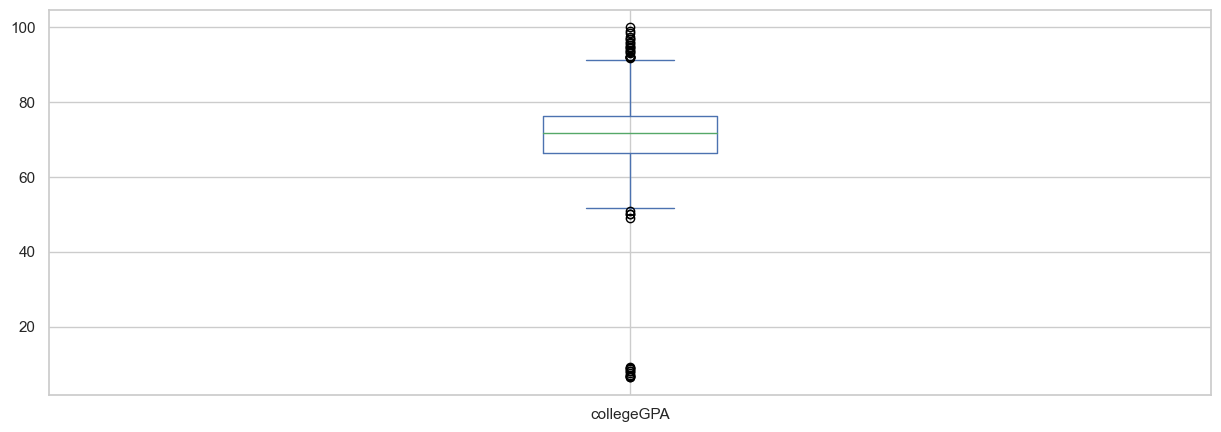

In [20]:
df['collegeGPA'].plot(kind='box', figsize=(15,5))


In [21]:
# there are student who are below average or have less then 20 gpa
# let see what happend to them and we can remove them for further analysis 

In [22]:
below_averageStudent= df[df['collegeGPA']<40]
below_averageStudent.head()

Salary                     Designation     JobCity Gender        DOB   
7     400000             mechanical engineer   Bangalore      m 1992-05-27  \
138   195000  business development managerde  coimbatore      m 1991-05-04   
788   180000     electrical project engineer       Jowai      m 1989-01-12   
1419  180000          java software engineer     Chennai      m 1993-06-14   
1439  360000             assistant professor          AM      m 1988-12-11   

      CollegeTier        Degree                    Specialization  collegeGPA   
7               1   B.Tech/B.E.            mechanical engineering        8.58  \
138             2   B.Tech/B.E.            information technology        6.63   
788             2  M.Tech./M.E.  electrical and power engineering        6.80   
1419            2   B.Tech/B.E.    computer science & engineering        6.85   
1439            2  M.Tech./M.E.           electronics engineering        8.07   

      GraduationYear    Branch  
7               2016      Mech  
138             2014       CSE  
788             2015  Electric  
1419            2014       CSE  
1439            2014       ECE

<Axes: xlabel='Branch'>

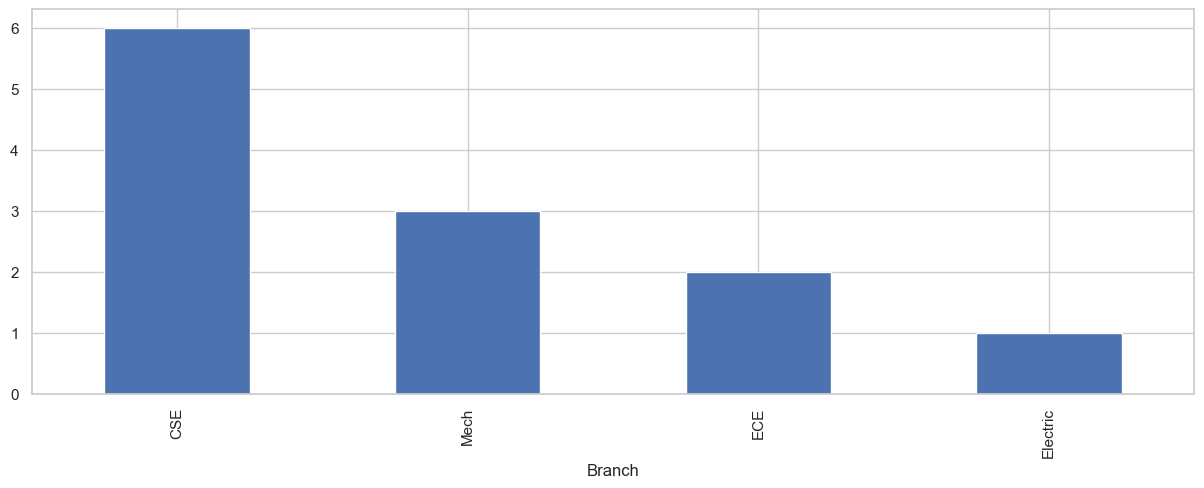

In [23]:
below_averageStudent['Branch'].value_counts().plot(kind='bar', figsize=(15,5))

In [24]:
# MOst of the Sudent who has below average GPA  are from CSE 

In [25]:
# analysing below_averageStudent 

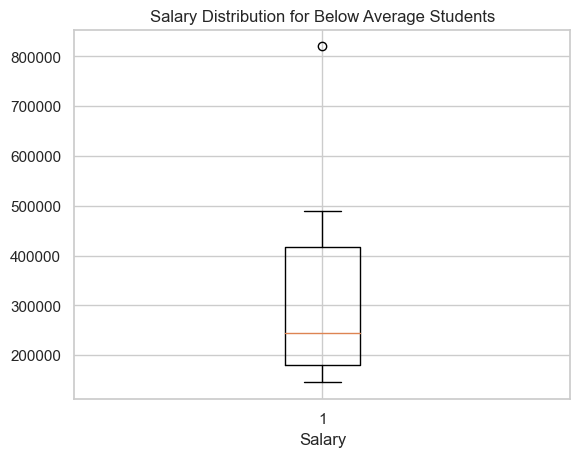

In [26]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# plot boxplot for below average students
plt.boxplot(below_averageStudent['Salary'])
plt.title("Salary Distribution for Below Average Students")
plt.xlabel("Salary")
plt.show()


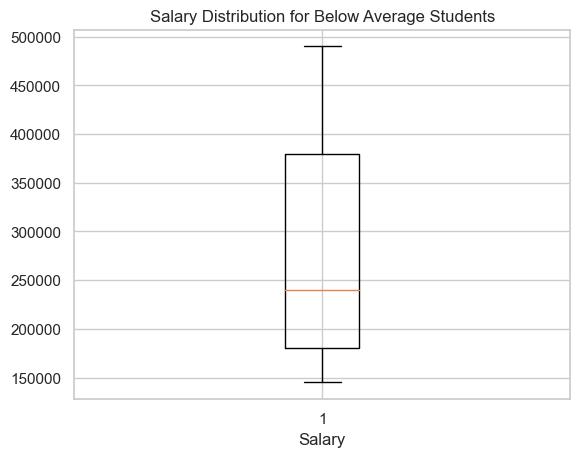

In [27]:
#since there is one outlier who got above 800000 salary we remove it
below_averageStudent=below_averageStudent[below_averageStudent['Salary']<600000]
plt.boxplot(below_averageStudent['Salary'])
plt.title("Salary Distribution for Below Average Students")
plt.xlabel("Salary")
plt.show()

In [28]:
# so most of the Below average student get average salary of 250000 


<Axes: >

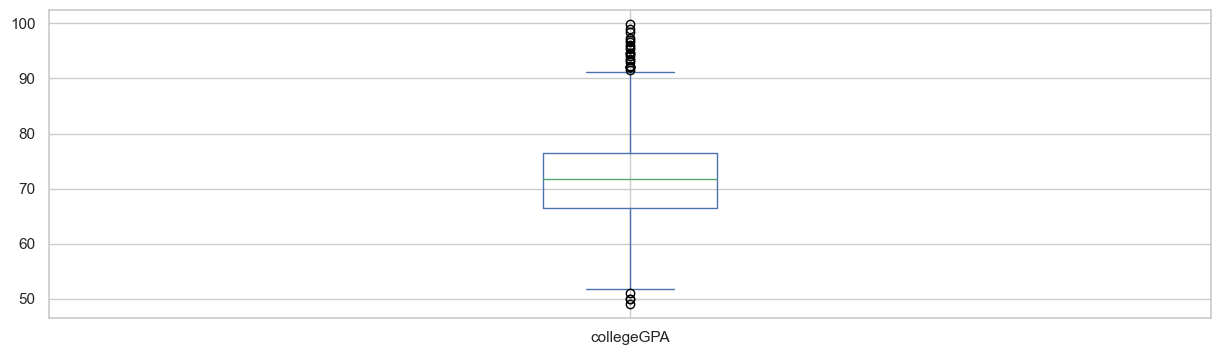

In [29]:
# removing Below average form main df
df = df[df['collegeGPA'] >= 40]
df['collegeGPA'].plot(kind="box", figsize=(15,4))

In [30]:
df.head()

Salary               Designation    JobCity Gender        DOB   
0   420000   senior quality engineer  Bangalore      f 1990-02-19  \
1   500000         assistant manager     Indore      m 1989-10-04   
2   325000          systems engineer    Chennai      f 1992-08-03   
3  1100000  senior software engineer    Gurgaon      m 1989-12-05   
4   200000                       get    Manesar      m 1991-02-27   

   CollegeTier       Degree                             Specialization   
0            2  B.Tech/B.E.                       computer engineering  \
1            2  B.Tech/B.E.  electronics and communication engineering   
2            2  B.Tech/B.E.                     information technology   
3            1  B.Tech/B.E.                       computer engineering   
4            2  B.Tech/B.E.  electronics and communication engineering   

   collegeGPA  GraduationYear Branch  
0       78.00            2011    CSE  
1       70.06            2012    ECE  
2       70.00            2014    CSE  
3       74.64            2011    CSE  
4       73.90            2012    ECE

In [31]:
df.Gender.value_counts()

Gender
m    3030
f     956
Name: count, dtype: int64

In [32]:
#changing m to male and f to female 
df['Gender'] = df['Gender'].replace({'m': 'male', 'f': 'female'})
df.Gender.value_counts()

Gender
male      3030
female     956
Name: count, dtype: int64

<Axes: xlabel='Gender'>

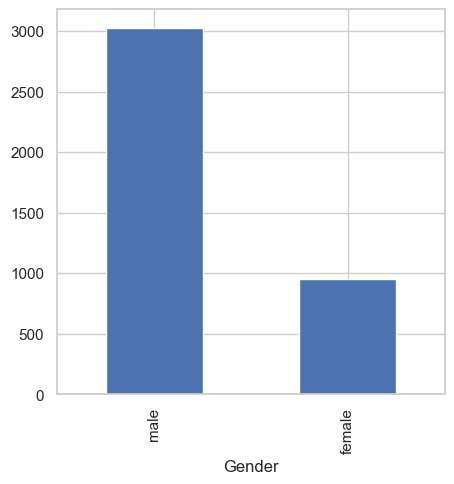

In [33]:
df['Gender'].value_counts().plot(kind='bar', figsize=(5,5))


In [34]:
# that there are more male students who are doing a job or receiving a salary than female students

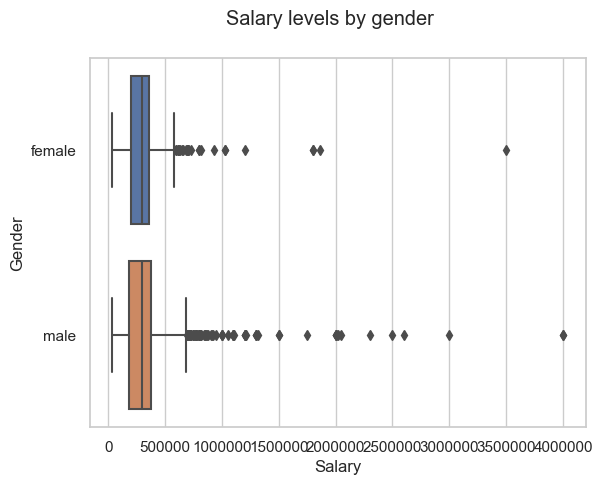

In [35]:
#boxplot visualization of salary levels by gender
sns.boxplot(x='Salary', y='Gender', data=df)
plt.suptitle('Salary levels by gender')
plt.ticklabel_format(style='plain', axis='x')
plt.show()


In [36]:
#higher outliers are observed in male category. Indicating that salaries above normal are earned more by males.
#since we have lot of outlier we can change there value so that we remove outlier without lossing data

<Axes: >

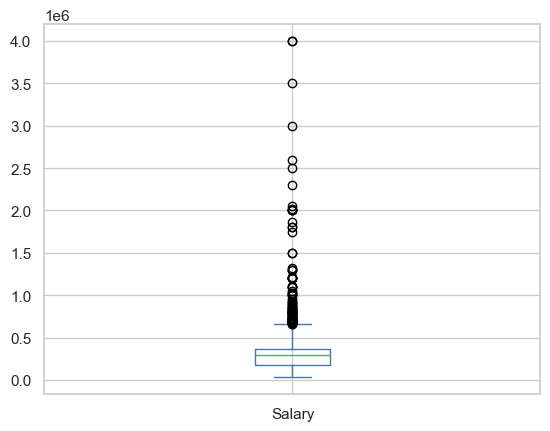

In [37]:
df['Salary'].plot(kind='box')

Text(0.5, 0.98, 'Salary levels by Branch')

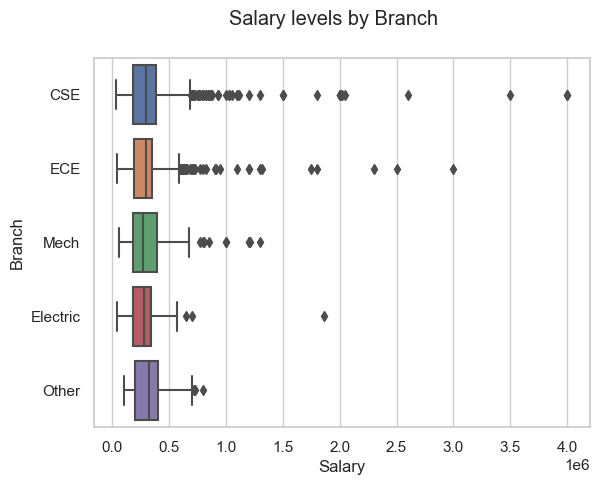

In [38]:
#boxplot visualization of salary and Branch.
sns.boxplot(x='Salary', y = 'Branch', data=df)
plt.suptitle('Salary levels by Branch')

In [39]:
#it is observed that CS department has many outliers indicating higher salaries are earned by those of CS specializaton


<Axes: >

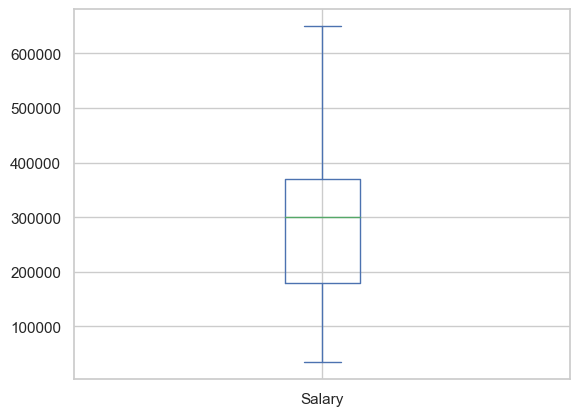

In [40]:
pct_98 = df['Salary'].quantile(0.97)
df['Salary'] = np.where(df['Salary'] > pct_98, pct_98, df['Salary'])
df['Salary'].plot(kind='box')

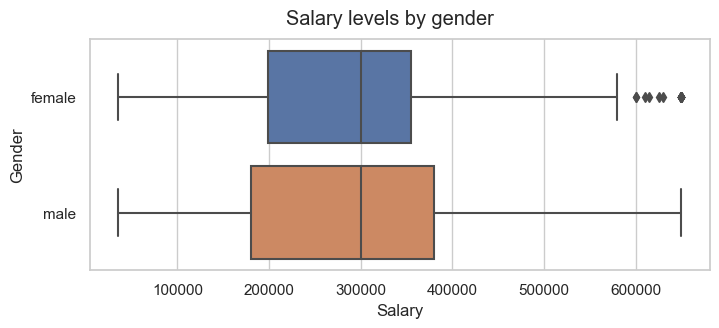

In [41]:
plt.figure(figsize=(8, 3))
sns.boxplot(x='Salary', y='Gender', data=df)
plt.suptitle('Salary levels by gender')
plt.ticklabel_format(style='plain', axis='x' )
plt.show()


In [42]:
df.Degree.value_counts()

Degree
B.Tech/B.E.      3691
MCA               243
M.Tech./M.E.       50
M.Sc. (Tech.)       2
Name: count, dtype: int64

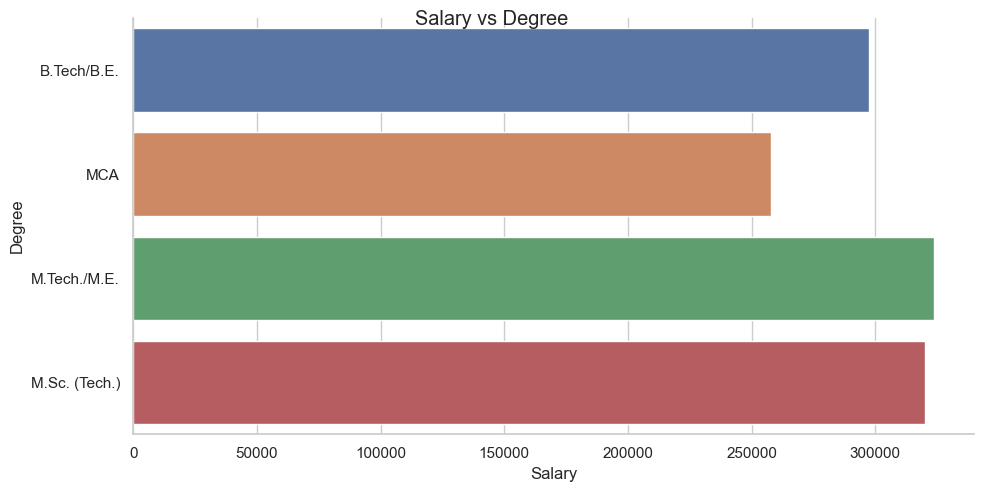

In [43]:
#bar graph of salary levels categorized based on Degree . and errorbar=None suppresses error bars
sns.catplot(x='Salary', y='Degree', kind='bar', data=df,errorbar=None ,  height=5, aspect=2)
plt.suptitle('Salary vs Degree')
plt.show()


In [44]:
#Students who done M.tech/ME tend to earn higher salaries than the other. Where as MCA Student Earn Lowest Salary


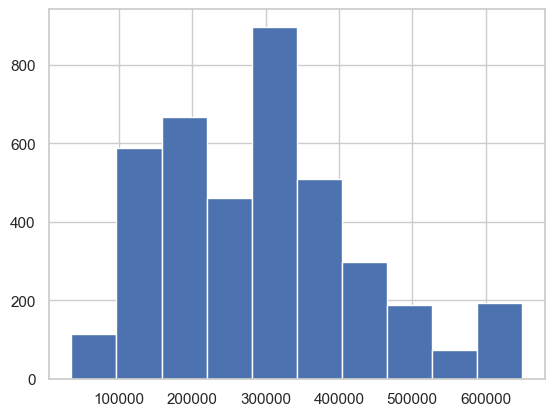

In [45]:
#histogram of salary data
plt.hist(df['Salary'],bins=10)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [46]:
# High Paying Jobs Are Less 

Text(0.5, 0.98, 'Salary levels by Branch')

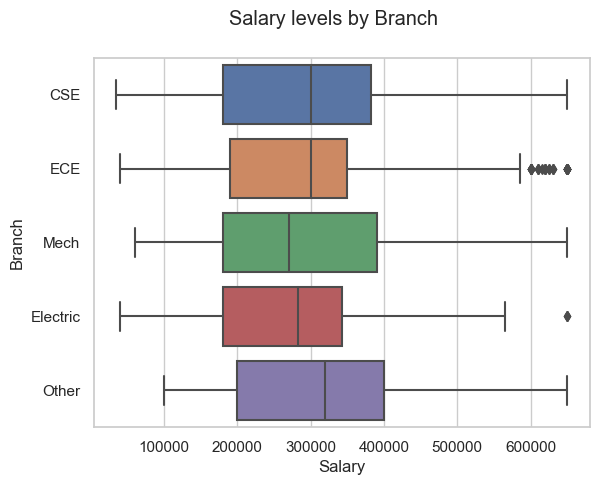

In [47]:
#boxplot visualization of salary and Branch.
sns.boxplot(x='Salary', y = 'Branch', data=df)
plt.suptitle('Salary levels by Branch')


In [48]:
# Still  higher salaries are earned by those of CS specializaton


In [49]:
df.CollegeTier.value_counts()

CollegeTier
2    3691
1     295
Name: count, dtype: int64

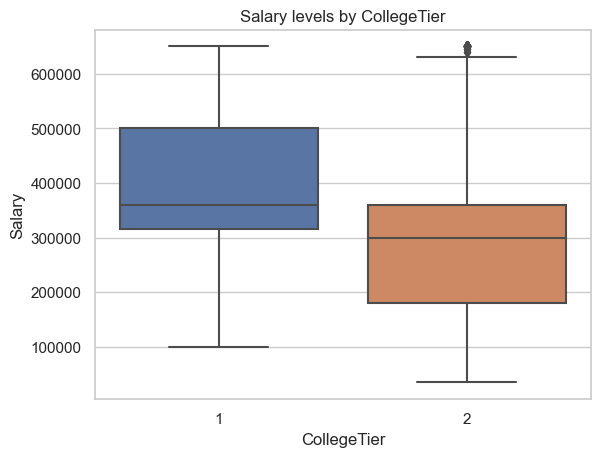

In [50]:
#boxplot visualization of salary and Branch.
sns.boxplot(x='CollegeTier', y='Salary', data=df)
plt.title('Salary levels by CollegeTier')
plt.show()

In [51]:
# Hypo Student from Tier1 got More Salary than Tier 2 Colleges


In [52]:
from scipy.stats import ttest_ind

# Filter the DataFrame to include only Tier 1 and Tier 2 students
tier1_df = df[df['CollegeTier'] == 1]
tier2_df = df[df['CollegeTier'] == 2]

# Perform the t-test
stat, p = ttest_ind(tier1_df['Salary'], tier2_df['Salary'], equal_var=False)

# Print the p-value
print(f"The p-value for the t-test is: {p:.4f}")


The p-value for the t-test is: 0.0000


In [53]:
# since p-value of 0.0000 indicates that there is a relationship between tier and Salary


In [54]:
df.JobCity.value_counts()

JobCity
Bangalore           626
-1                  460
Noida               368
Hyderabad           335
Pune                290
                   ... 
Ernakulam             1
Nanded                1
Dharmapuri            1
Vandavasi             1
Asifabadbanglore      1
Name: count, Length: 336, dtype: int64

In [55]:
city_salary = df.groupby('JobCity')['Salary'].mean().reset_index()
city_salary = city_salary.sort_values(by='Salary', ascending=False)
print(city_salary.head())

          JobCity    Salary
127      Jamnagar  650000.0
134  Johannesburg  650000.0
73         Dammam  650000.0
159        MUMBAI  650000.0
162   Maharajganj  650000.0


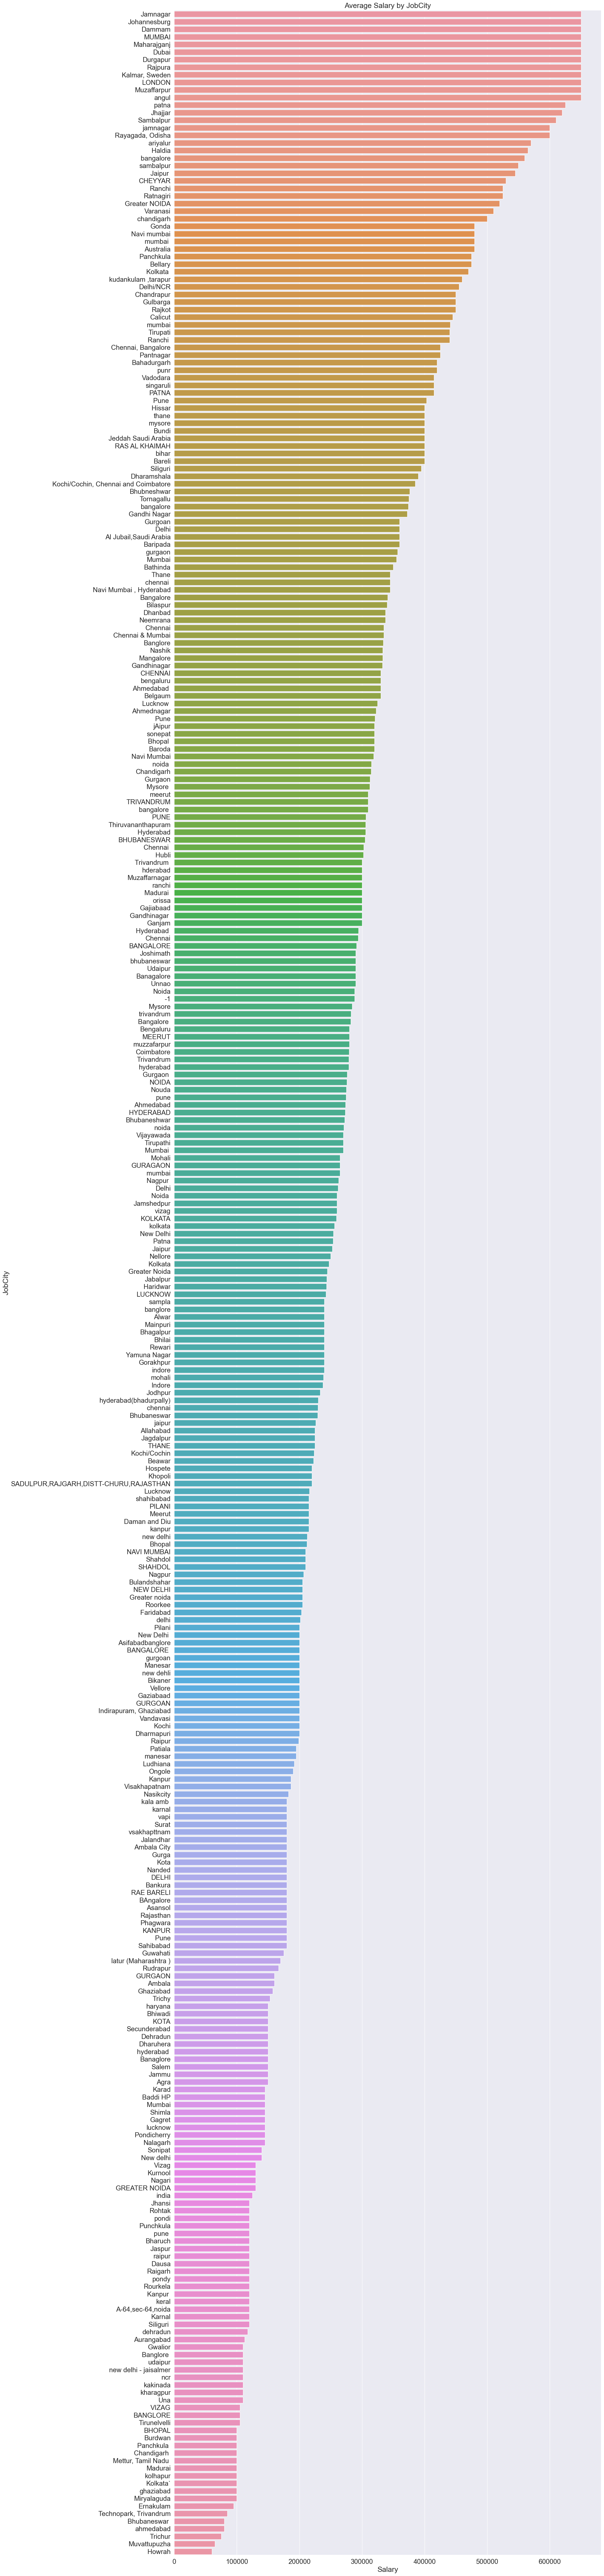

In [56]:
# group the data by JobCity and calculate the mean salary for each group
jobcity_salary = df.groupby('JobCity')['Salary'].mean().reset_index()
jobcity_salary = jobcity_salary.sort_values(by='Salary', ascending=False)

# set the figure size and font size of the axis labels
plt.figure(figsize=(20, 120))
sns.set(font_scale=1.6)

# create the barplot of average salaries by designation
sns.barplot(x='Salary', y='JobCity', data=jobcity_salary)

# set the title of the plot
plt.title('Average Salary by JobCity')

# show the plot
plt.show()






In [57]:
# 127      Jamnagar  650000.0
# 134  Johannesburg  650000.0
# 73         Dammam  650000.0
# 159        MUMBAI  650000.0
# 162   Maharajganj  650000.0
# this Cities Are giving Highest Salary 

In [58]:
df.Designation.value_counts()

Designation
software engineer                    537
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     117
                                    ... 
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
clerical assistant                     1
jr. software developer                 1
Name: count, Length: 418, dtype: int64

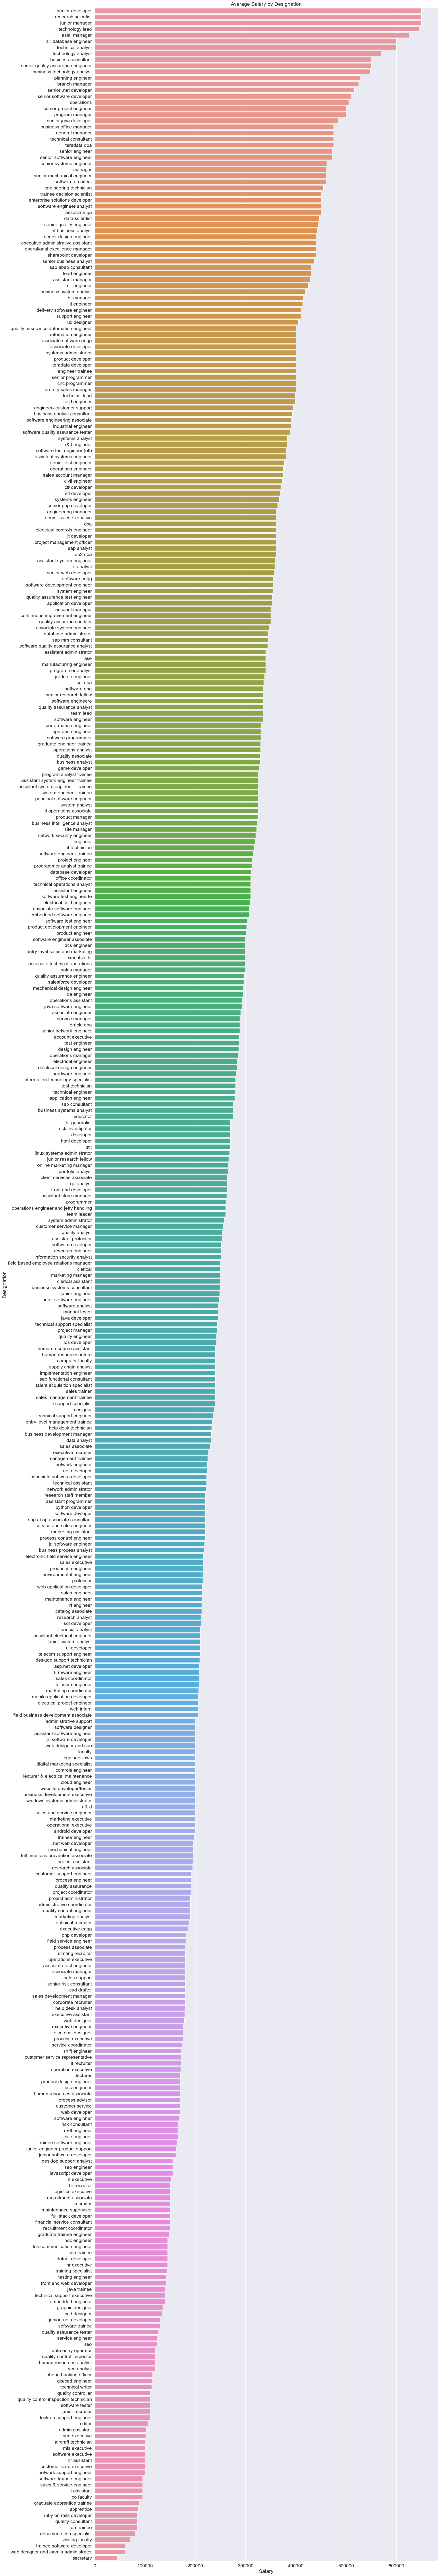

In [59]:

# group the data by designation and calculate the mean salary for each group
designation_salary = df.groupby('Designation')['Salary'].mean().reset_index()
designation_salary = designation_salary.sort_values(by='Salary', ascending=False)

# set the figure size and font size of the axis labels
plt.figure(figsize=(20, 150))
sns.set(font_scale=1.4)

# create the barplot of average salaries by designation
sns.barplot(x='Salary', y='Designation', data=designation_salary)

# set the title of the plot
plt.title('Average Salary by Designation')

# show the plot
plt.show()






In [60]:
#Senior developer, research scientist, junior manager,  technology lead,  are highest paying job Role.

In [61]:
# RESEARCH 

In [62]:
target_designations = ['programming analyst',
 'software engineer',
 'hardware engineer',
 'associate engineer']
filtered_df = df[df['Designation'].isin(target_designations)]
average_salary = filtered_df['Salary'].mean()
print(f"The average salary for fresh graduates with target designations is: {average_salary:.2f} lakhs")


The average salary for fresh graduates with target designations is: 333584.39 lakhs


here average salary for fresh graduates with target designations is around 3.3-3.4 lakhs,
which supports the claim made in the Times of India article.

 Task 2
 -Is there a relationship between gender and specialisation? 
 (i.e. Does the preference of Specialisation depend on the Gender?)

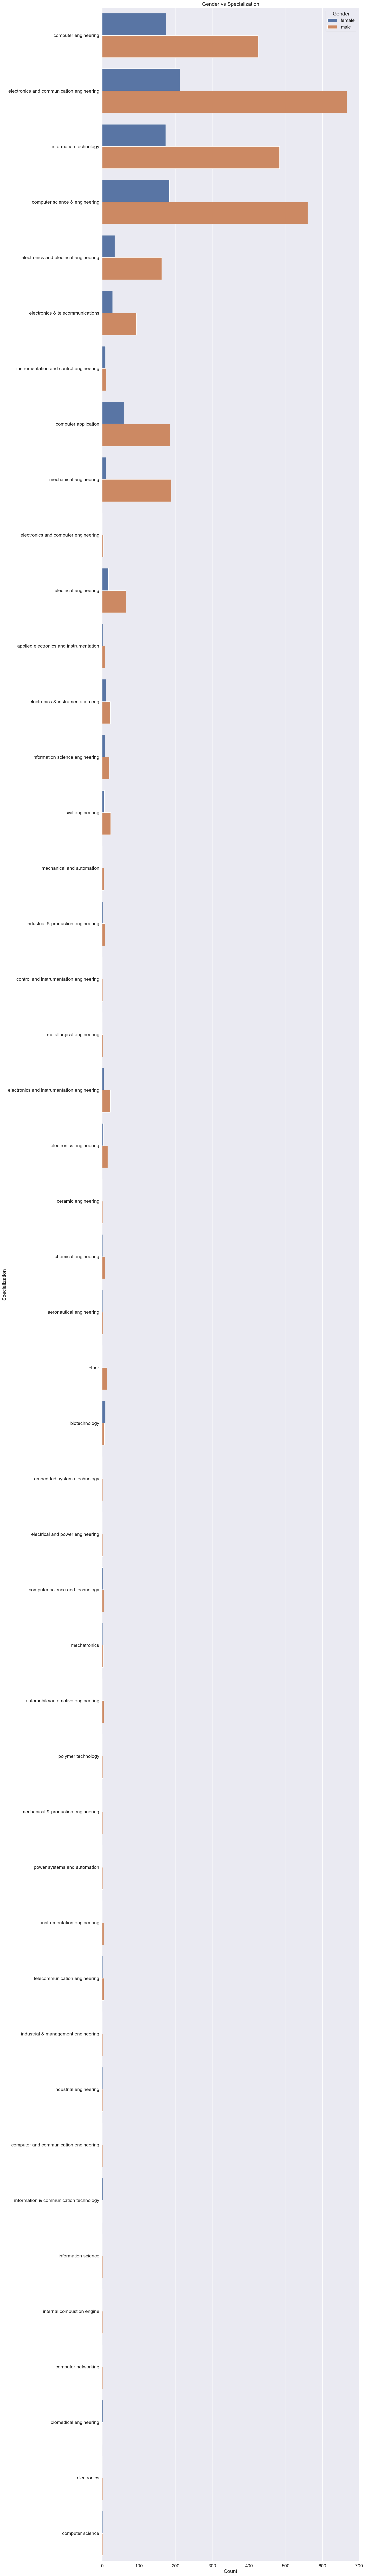

In [63]:
plt.figure(figsize=(15, 150))

sns.countplot(y='Specialization', hue='Gender', data=df)
plt.title('Gender vs Specialization')
plt.xlabel('Count')
plt.ylabel('Specialization')
plt.show()


as seen in graph that males are present more in almost all specializations, it could suggest that there may be a relationship between gender and specialization. However, we need to perform statistical tests, such as a chi-squared test, to determine if this relationship is significant or if it could have occurred by chance.

In [64]:
from scipy.stats import chi2_contingency

# Create a contingency table of gender and specialization
contingency_table = pd.crosstab(df['Gender'], df['Specialization'])

# Perform the chi-squared test
stat, p, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print(f"The p-value for the chi-squared test is: {p:.4f}")


The p-value for the chi-squared test is: 0.0000


A p-value of 0.0000 means that the probability of observing the relationship between gender and specialization by chance is extremely low. In other words, there is strong evidence to suggest that there is a significant relationship between gender and specialization.

# Conclusion

Based on the given data, we can conclude the following:

1 Most of the specializations are in the Computer Science department, followed by ECE.

2 Most of the students got a GPA between 70-80.

3 Students who are below average or have less than 20 GPA are mostly from CSE.

4 Most of the below-average students get an average salary of 250,000.

5 There are more male students who are doing a job or receiving a salary than female students.

6 Higher outliers are observed in the male category, indicating that salaries above normal are earned more by males.

7 The CS department has many outliers indicating higher salaries are earned by those of CS specialization.

8 Students who have done MTech/ME tend to earn higher salaries than others, whereas MCA students earn the lowest salary.

9 High paying jobs are less in number.

10 Students from Tier 1 colleges tend to get more salary than Tier 2 colleges.

11 The cities of Jamnagar, Johannesburg, Dammam, Mumbai, and Maharajganj are giving the highest salaries.

12 Senior developer, research scientist, junior manager, and technology lead are the highest-paying job roles.

13 The average salary for fresh graduates with target designations is around 3.3-3.4 lakhs, which supports the claim made in the    Times of India article.

14 Males are present more in all specializations, indicating a potential relationship between gender and specialization. A
   p-value of 0.0000 means that the probability of observing this relationship by chance is extremely low. There is strong
   evidence to suggest that there is a significant relationship between gender and specialization.